#KNN (K Nearest Neighbors) Classification

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
flower_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['flower']=df['target'].map(flower_mapping)
df[48:102]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor
55,5.7,2.8,4.5,1.3,1,versicolor
56,6.3,3.3,4.7,1.6,1,versicolor
57,4.9,2.4,3.3,1.0,1,versicolor


In [8]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

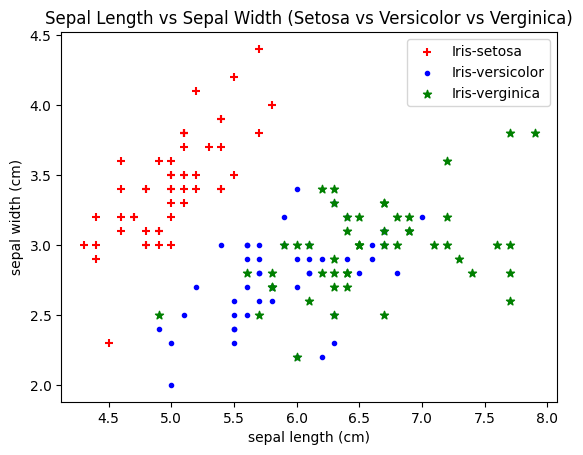

In [9]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='red',marker='+',label='Iris-setosa')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='.',label='Iris-versicolor')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='green',marker='*',label='Iris-verginica')
plt.title('Sepal Length vs Sepal Width (Setosa vs Versicolor vs Verginica)')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()

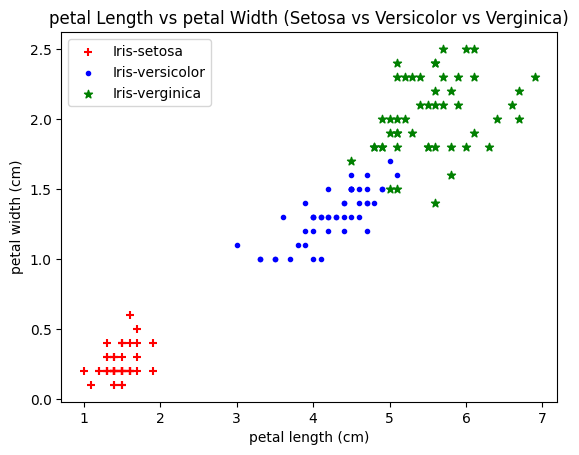

In [10]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red',marker='+',label='Iris-setosa')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker='.',label='Iris-versicolor')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green',marker='*',label='Iris-verginica')
plt.title('petal Length vs petal Width (Setosa vs Versicolor vs Verginica)')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

In [11]:
from sklearn.model_selection import train_test_split
x=df.drop(['target','flower'],axis=1)
y=df.target

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
len(x_train)

120

In [14]:
len(x_test)

30

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [34]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
knn.score(x_test,y_test)

1.0

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test , y_pred)
cm

array([[11,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 10]])

Text(58.222222222222214, 0.5, 'actual_value')

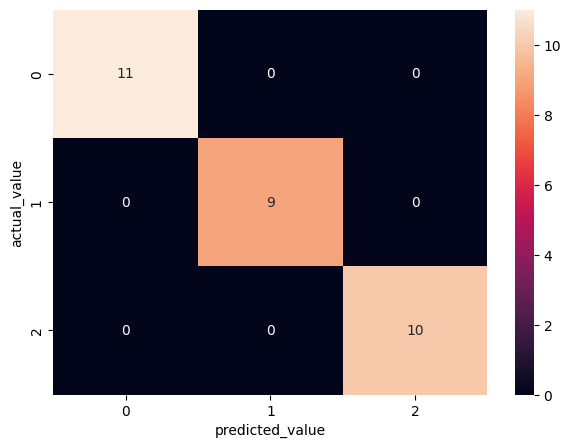

In [40]:
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted_value')
plt.ylabel('actual_value')